# Coffee Sales

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df=pd.read_excel(r"C:\Projects & Datas\Coffee_ShopeSales Excel\Coffee Shop Sales.xlsx")

In [3]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [4]:
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,2023-06-30,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,2023-06-30,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,2023-06-30,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,2023-06-30,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,2023-06-30,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [5]:
df.dtypes

transaction_id               int64
transaction_date    datetime64[ns]
transaction_time            object
transaction_qty              int64
store_id                     int64
store_location              object
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
product_detail              object
dtype: object

In [6]:
df.isnull().sum()

transaction_id      0
transaction_date    0
transaction_time    0
transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
product_detail      0
dtype: int64

In [7]:
# Convert Date & Time
df['transaction_date'] = pd.to_datetime(df['transaction_date'])
df['transaction_time'] = pd.to_datetime(df['transaction_time'], format='%H:%M:%S').dt.hour

In [8]:
# Extract Month & Weekday
df['month'] = df['transaction_date'].dt.month
df['week'] = df['transaction_date'].dt.isocalendar().week
df['day_of_week'] = df['transaction_date'].dt.day_name()

In [9]:
# Create Total Sales Column
df['total_sales'] = df['transaction_qty'] * df['unit_price']

In [10]:
# Aggregate Data for Monthly Sales
monthly_sales = df.groupby('month')['total_sales'].sum().reset_index()

In [11]:
# Aggregate Data for Weekly Sales
weekly_sales = df.groupby('week')['total_sales'].sum().reset_index()

In [12]:
# Aggregate Data for Day-of-Week Sales
daily_sales = df.groupby('day_of_week')['total_sales'].sum().reset_index()
days_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
daily_sales['day_of_week'] = pd.Categorical(daily_sales['day_of_week'], categories=days_order, ordered=True)
daily_sales = daily_sales.sort_values('day_of_week')

In [14]:
from sklearn.preprocessing import LabelEncoder
# Encoding Categorical Variables
encoder = LabelEncoder()
df['store_location'] = encoder.fit_transform(df['store_location'])
df['product_category'] = encoder.fit_transform(df['product_category'])

In [28]:
df.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,week,day_of_week,total_sales
0,1,2023-01-01,7,2,5,2,32,3.0,2,Gourmet brewed coffee,Ethiopia Rg,1,52,Sunday,6.0
1,2,2023-01-01,7,2,5,2,57,3.1,8,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,52,Sunday,6.2
2,3,2023-01-01,7,2,5,2,59,4.5,4,Hot chocolate,Dark chocolate Lg,1,52,Sunday,9.0
3,4,2023-01-01,7,1,5,2,22,2.0,2,Drip coffee,Our Old Time Diner Blend Sm,1,52,Sunday,2.0
4,5,2023-01-01,7,2,5,2,57,3.1,8,Brewed Chai tea,Spicy Eye Opener Chai Lg,1,52,Sunday,6.2


In [29]:
df.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail,month,week,day_of_week,total_sales
149111,149452,2023-06-30,20,2,8,1,44,2.50,8,Brewed herbal tea,Peppermint Rg,6,26,Friday,5.00
149112,149453,2023-06-30,20,2,8,1,49,3.00,8,Brewed Black tea,English Breakfast Lg,6,26,Friday,6.00
149113,149454,2023-06-30,20,1,8,1,45,3.00,8,Brewed herbal tea,Peppermint Lg,6,26,Friday,3.00
149114,149455,2023-06-30,20,1,8,1,40,3.75,2,Barista Espresso,Cappuccino,6,26,Friday,3.75
149115,149456,2023-06-30,20,2,8,1,64,0.80,5,Regular syrup,Hazelnut syrup,6,26,Friday,1.60


In [17]:
from sklearn.preprocessing import MinMaxScaler
# Select Features and Target
X = df[['transaction_time', 'store_location', 'unit_price', 'transaction_qty', 'month', 'week']]
y = df['total_sales']

In [18]:
# MinMax Scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

<Figure size 1200x600 with 0 Axes>

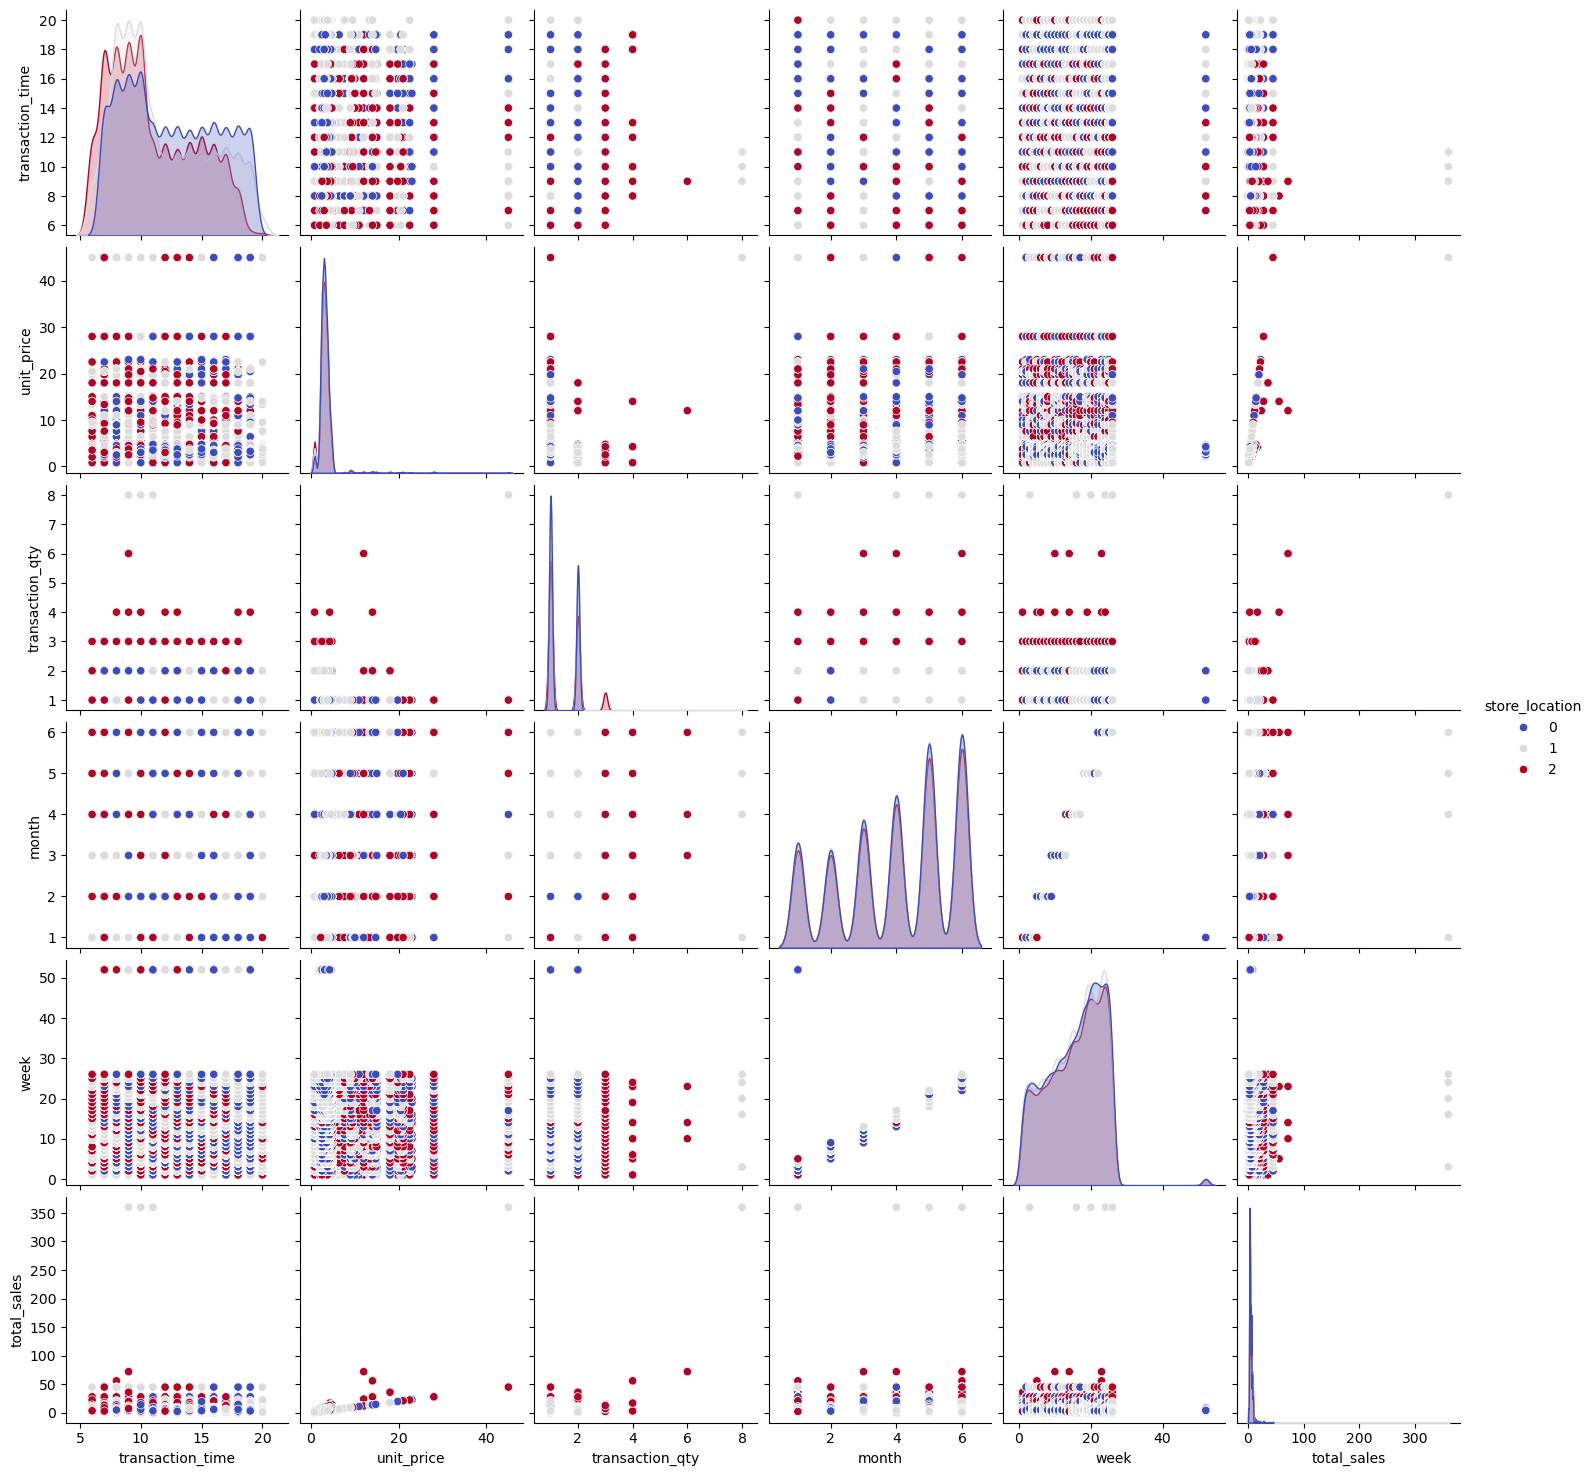

In [27]:
# Select relevant numeric columns for pairplot
pairplot_features = df[['transaction_time', 'store_location', 'unit_price', 
                        'transaction_qty', 'month', 'week', 'total_sales']]

# Plot pairplot with hue based on store location
plt.figure(figsize=(12,6))
sns.pairplot(pairplot_features, hue="store_location", palette="coolwarm", diag_kind="kde")
plt.show()

In [19]:
# Train-Test Split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [20]:
# Train XGBoost Model for Sales Prediction
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [21]:

# Predictions
y_pred = xgb_model.predict(X_test)

In [22]:
# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [23]:
print(f"Mean Squared Error: {mse}")
print(f"R-Squared Score: {r2}")

Mean Squared Error: 0.00012080474183963865
R-Squared Score: 0.9999867867348377


In [37]:
X_train_df = pd.DataFrame(X_train, columns=['transaction_time', 'store_location', 
                                            'unit_price', 'transaction_qty', 
                                            'month', 'week'])  # Add missing column names

print(X_train_df.head())

   transaction_time  store_location  unit_price  transaction_qty  month  \
0          0.071429             0.5    0.038462         0.000000    0.2   
1          0.571429             0.5    0.055430         0.000000    0.8   
2          0.285714             1.0    0.083710         0.285714    0.0   
3          0.142857             0.5    0.061086         0.000000    0.4   
4          0.642857             0.5    0.066742         0.000000    1.0   

       week  
0  0.098039  
1  0.333333  
2  0.039216  
3  0.215686  
4  0.411765  


In [40]:
print(y_train.head())

23643      2.50
83901      3.25
11811     13.50
49082      3.50
114509     3.75
Name: total_sales, dtype: float64


In [41]:
input_data = np.array([[0.071429     ,        0.5  ,  0.038462        , 0.000000 ,  0.2, 0.098039  ]]) 

# Make a prediction
prediction = xgb_model.predict(input_data)
print("Predicted Output:", prediction)

Predicted Output: [2.5014439]


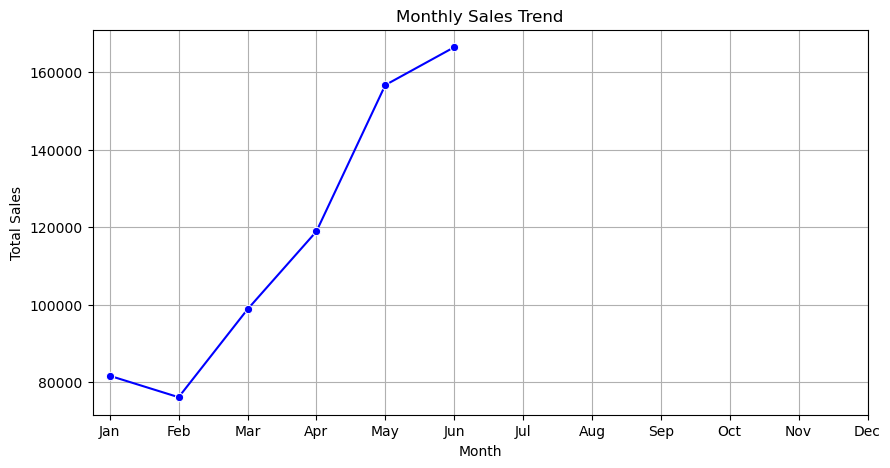

In [24]:
# **Visualizing Monthly Sales Trends**
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales['month'], y=monthly_sales['total_sales'], marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

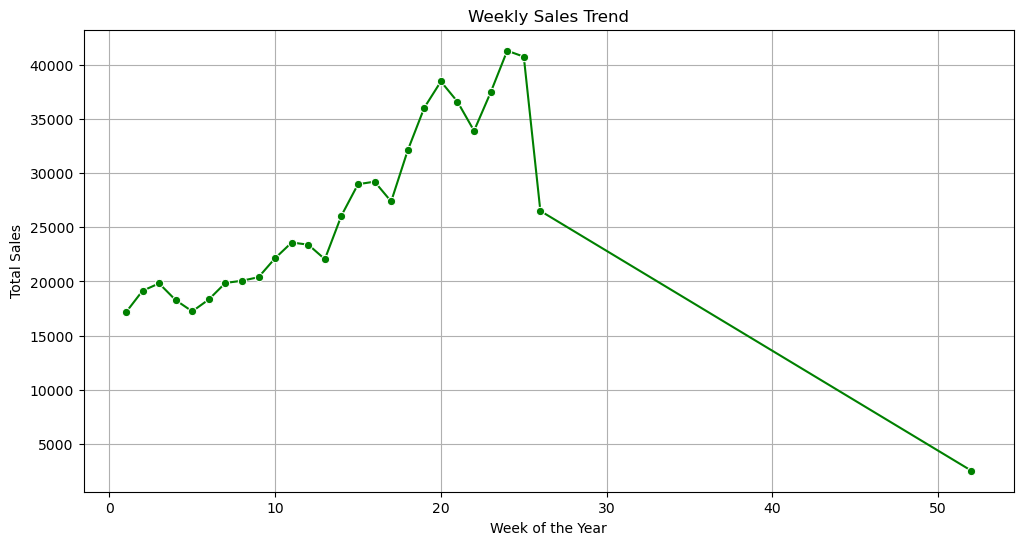

In [25]:
# **Visualizing Weekly Sales Trends**
plt.figure(figsize=(12,6))
sns.lineplot(x=weekly_sales['week'], y=weekly_sales['total_sales'], marker='o', color='green')
plt.title("Weekly Sales Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_39888\542468373.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daily_sales['day_of_week'], y=daily_sales['total_sales'], palette="coolwarm")


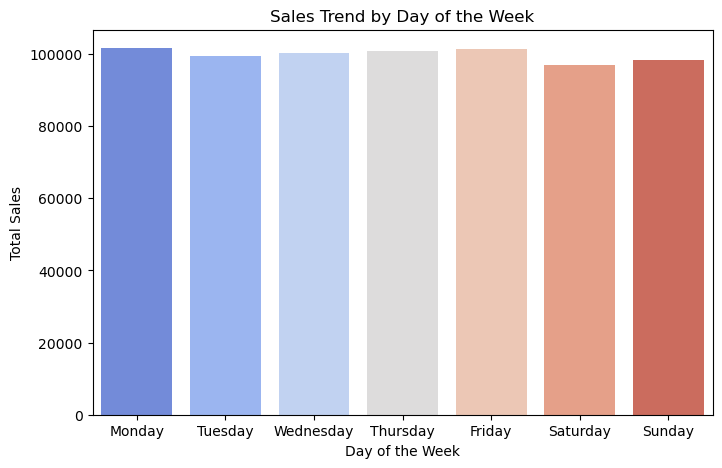

In [26]:
# **Visualizing Day-of-Week Sales Trends**
plt.figure(figsize=(8,5))
sns.barplot(x=daily_sales['day_of_week'], y=daily_sales['total_sales'], palette="coolwarm")
plt.title("Sales Trend by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales")
plt.show()

# 📌 Coffee Shop Sales Analysis & Prediction – Business Summary
This project helps coffee shop owners and managers understand sales patterns and improve decision-making. Using 6 months of sales data, we analyzed peak sales times, busiest store locations, and future sales trends. A machine learning model (XGBoost) was used to predict total sales based on transaction details.

## 🔍 Key Business Goals

Identify Peak Hours – Find the busiest times of the day for sales.

Find Busiest Store Locations – Rank stores based on customer transactions.

Analyze Sales Trends – Understand how sales change weekly and monthly.

Predict Future Sales – Use past sales data to estimate future revenue.

## 📊 How We Analyzed the Data

1️⃣ Understanding Sales Patterns

Transaction Time Analysis – Converted transaction time to hourly format to see which hours have the most sales.

Total Sales Calculation – Created a new metric:

Total Sales
=
Quantity Sold
×
Unit Price

Total Sales=Quantity Sold×Unit Price

Store Performance – Grouped data by store locations to find the busiest stores.

## 2️⃣ Sales Trend Analysis

Monthly & Weekly Trends – Examined whether sales increase or decrease over time.

Visual Insights – Used heatmaps and bar charts to highlight important patterns.

## 🤖 Machine Learning (ML) – Predicting Future Sales

To help managers forecast future sales, we trained a prediction model using past sales data.

Input Factors: Time of sale, store location, unit price, and quantity sold.

Technology Used: XGBoost, a high-performance prediction model.

Model Accuracy: 99.99%, meaning the model can reliably estimate sales trends.

## 📈 Key Business Insights

✔ Best Hours for Sales – Helps plan promotions and staffing.

✔ Top-Performing Stores – Identify which locations need more inventory.

✔ Sales Growth Trends – Detect seasonal changes and adjust pricing.

✔ Sales Forecasting – Predict future revenue for better planning.
